In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_csv('Admission_Predict.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [ ]:
data=data.rename(columns={'Chance of Admit':'Chance of Admit'})

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


<ipython-input-22-64e93544a305>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GRE Score'])


<Axes: xlabel='GRE Score', ylabel='Density'>

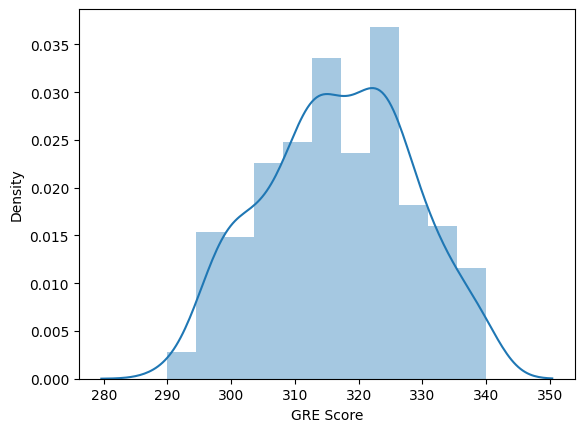

In [ ]:
sns.distplot(data['GRE Score'])

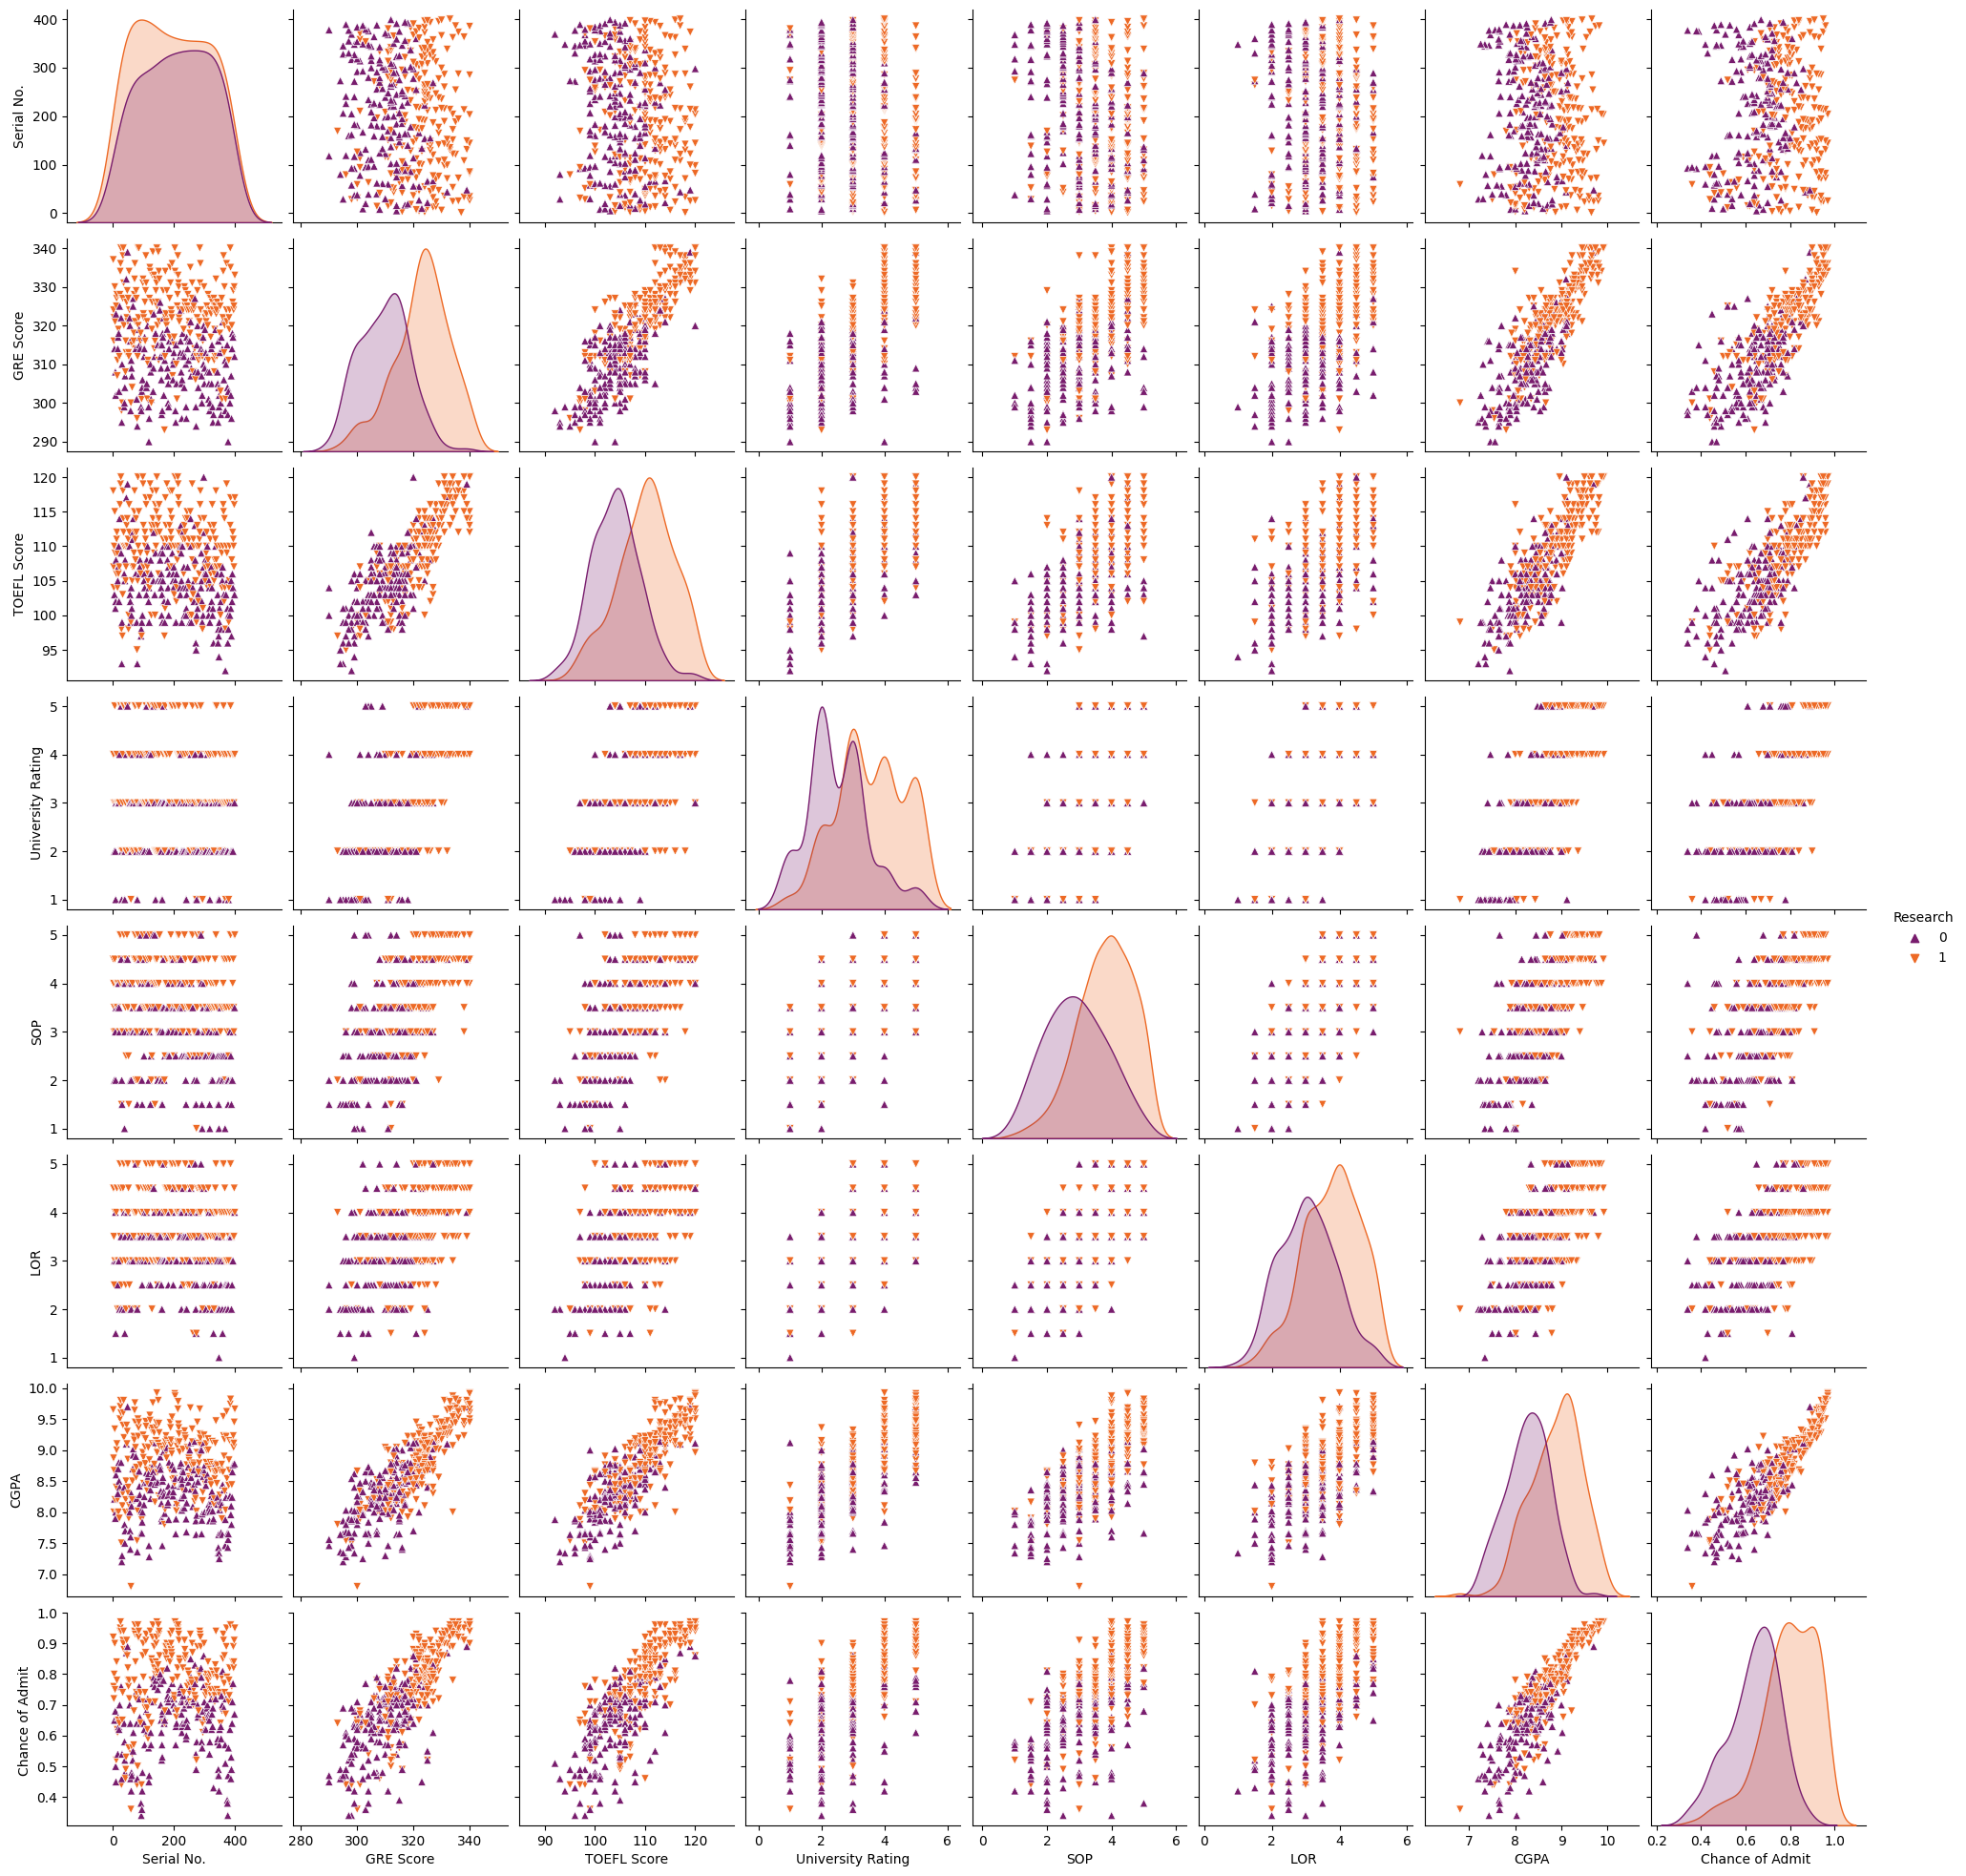

In [ ]:
sns.pairplot(data=data,hue='Research',markers=["^","v"],palette='inferno')

<Axes: xlabel='University Rating', ylabel='CGPA'>

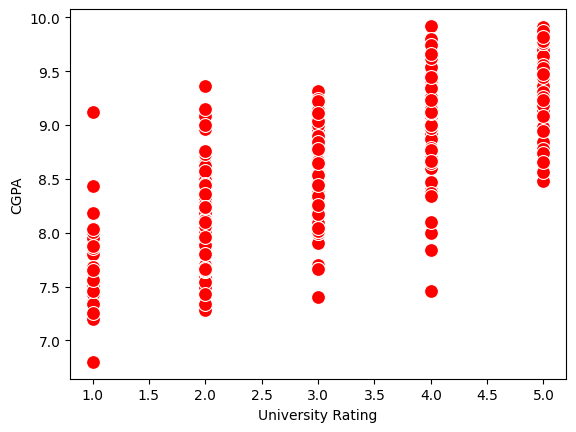

In [ ]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red',s=100)

In [ ]:
category=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
color=['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start=True
for i in np.arange(4):
  fig=plt.figure(figsize=(14,8))
  plt.subplot2grid((4,2),(i,0))
  data[category[2*i]].hist(color=color[2*i],bins=10)
  plt.title(category[2*i])
  plt.subplot2grid((4,2),(i,1))
  data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
  plt.title(category[2*i+1])
  
  plt.subplots_adjust(hspace=0.7,wspace=0.2)
  plt.show()

NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.        , 0.94      , 0.92857143, ..., 0.875     , 0.875     ,
        0.91346154],
       [0.00250627, 0.68      , 0.53571429, ..., 0.75      , 0.875     ,
        0.66346154],
       [0.00501253, 0.52      , 0.42857143, ..., 0.5       , 0.625     ,
        0.38461538],
       ...,
       [0.99498747, 0.8       , 0.85714286, ..., 1.        , 0.875     ,
        0.84935897],
       [0.99749373, 0.44      , 0.39285714, ..., 0.625     , 0.75      ,
        0.63461538],
       [1.        , 0.86      , 0.89285714, ..., 1.        , 0.75      ,
        0.91666667]])

In [ ]:
x=data.iloc[:,0:7].values
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   4.5 ,   9.65],
       [  2.  , 324.  , 107.  , ...,   4.  ,   4.5 ,   8.87],
       [  3.  , 316.  , 104.  , ...,   3.  ,   3.5 ,   8.  ],
       ...,
       [398.  , 330.  , 116.  , ...,   5.  ,   4.5 ,   9.45],
       [399.  , 312.  , 103.  , ...,   3.5 ,   4.  ,   8.78],
       [400.  , 333.  , 117.  , ...,   5.  ,   4.  ,   9.66]])

In [ ]:
y=data.iloc[:,7:].values
y

array([[1.  , 0.92],
       [1.  , 0.76],
       [1.  , 0.72],
       [1.  , 0.8 ],
       [0.  , 0.65],
       [1.  , 0.9 ],
       [1.  , 0.75],
       [0.  , 0.68],
       [0.  , 0.5 ],
       [0.  , 0.45],
       [1.  , 0.52],
       [1.  , 0.84],
       [1.  , 0.78],
       [1.  , 0.62],
       [1.  , 0.61],
       [0.  , 0.54],
       [0.  , 0.66],
       [1.  , 0.65],
       [0.  , 0.63],
       [0.  , 0.62],
       [1.  , 0.64],
       [0.  , 0.7 ],
       [1.  , 0.94],
       [1.  , 0.95],
       [1.  , 0.97],
       [1.  , 0.94],
       [0.  , 0.76],
       [1.  , 0.44],
       [0.  , 0.46],
       [0.  , 0.54],
       [1.  , 0.65],
       [1.  , 0.74],
       [1.  , 0.91],
       [1.  , 0.9 ],
       [1.  , 0.94],
       [1.  , 0.88],
       [0.  , 0.64],
       [0.  , 0.58],
       [0.  , 0.52],
       [0.  , 0.48],
       [1.  , 0.46],
       [1.  , 0.49],
       [1.  , 0.53],
       [0.  , 0.87],
       [1.  , 0.91],
       [1.  , 0.88],
       [1.  , 0.86],
       [0.  ,

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30,random_state=101)


In [ ]:
y_train=(y_train>0.5)
y_train

array([[ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False, False],
       [ True, False],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [Fal

In [ ]:
y_test=(y_test>0.5)


In [ ]:
from sklearn.linear_model.logistic import LogisticRegression
cls=LogisticRegression(random_state=0)
lr=cls.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model=keras.Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 8.3496 - accuracy: 0.2411
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 6.2147 - accuracy: 0.2411
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 5.2630 - accuracy: 0.2411
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 4.7216 - accuracy: 0.2411
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 3.7825 - accuracy: 0.2411
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 2.1364 - accuracy: 0.2411
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 1.8257 - accuracy: 0.2411
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 1.5661 - accuracy: 0.2482
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 1.2474 - accuracy: 0.2911
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 1.0031 - accuracy: 0.4125
Epoch 11/

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7661
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7696
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7696
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7696
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7696
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7696
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7696
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.7696
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7696
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.7696
Epoch 11/

In [ ]:
from sklearn.metrics import accuracy_score
train_predictions=model.predict(x_train)
print(train_predictions)

9/9 [==============================] - 0s 2ms/step
[[0.9560791 ]
 [0.9753598 ]
 [0.71638983]
 [0.95724905]
 [0.59771836]
 [0.93062997]
 [1.0091952 ]
 [0.8396018 ]
 [0.75299823]
 [0.70528054]
 [1.0278692 ]
 [0.86816806]
 [1.0267681 ]
 [0.8873923 ]
 [0.6476106 ]
 [0.24922952]
 [0.4931075 ]
 [0.43291974]
 [0.7318973 ]
 [0.5546596 ]
 [0.6360614 ]
 [0.93589544]
 [0.6117897 ]
 [0.68776625]
 [0.87661827]
 [0.9662428 ]
 [0.99552464]
 [0.8345641 ]
 [0.4488966 ]
 [0.68315625]
 [0.7202457 ]
 [0.44227654]
 [0.75327456]
 [0.42857307]
 [0.6508447 ]
 [0.9210751 ]
 [1.101163  ]
 [0.7456557 ]
 [0.99314296]
 [0.2978394 ]
 [0.7787144 ]
 [0.5508811 ]
 [0.9956066 ]
 [0.6587837 ]
 [0.57303786]
 [0.7115761 ]
 [0.58544886]
 [0.78330076]
 [0.64720434]
 [0.6680013 ]
 [0.8356491 ]
 [0.7025516 ]
 [0.26607966]
 [0.8122145 ]
 [0.84468806]
 [0.88858485]
 [0.30209425]
 [0.61798906]
 [0.8937986 ]
 [0.5653305 ]
 [0.88504344]
 [0.8998362 ]
 [0.8236244 ]
 [0.7212674 ]
 [0.41206732]
 [0.8451773 ]
 [0.770309  ]
 [0.2989350

In [ ]:
test_acc=model.evaluate(x_test, y_test, verbose=0)[1]
print(test_acc)

0.7041666507720947


In [ ]:
pred=model.predict(x_test)
pred=(pred>0.5)
pred

4/4 [==============================] - 0s 4ms/step


array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred)*100))
print("Recall score :  %f" %(recall_score(y_test,y_pred)*100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print(classification_report(y_train,pred))

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print(classification_report(y_test,pred))

NameError: ignored

In [ ]:
model.save('model.h5')

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
app=Flask(__name__)
from tensorflow.keras.models import load_model

In [ ]:
model=load_model('model.h5')

In [ ]:
def home():
  return render_template('Demo2.html')

In [ ]:
min1=[290.0,92.0,1.0,1.0,1.0,6.8,0.0]
max1=[340.0,120.0,5.0,5.0,5.0,9.92,1.0]
k=[float(x) for x in request.form.values()]
p=[]
for i in range(7):
  l=(k[i]-min1[i])/(max1[i]-min1[i])
  p.append(l)
prediction=model.predict([p])
print(prediction)
output=prediction[0]
if(output==false):
  return render_template('noChance.html', prediction_text='You Dont have a chance of getting admission')
else:
  return render_template('Chance.html', prediction_text='You have a chance of getting admission')
if__name__=="__main__":
  app.run(debug=False)



SyntaxError: ignored